# Project: No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. ‘ScheduledDay’ tells us on what day the patient set up their appointment.‘Neighborhood’ indicates the location of the hospital. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. We will figure out the important factors for patient not show up the appointmnet in this project. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### After double check by info() and isnull() function, we can find it is pretty good that no missing values for the dataset. Then, check if there's any duplicated records in the data set.

In [5]:
df.duplicated().sum()

0

#### Since there's no duplicated, it is good to be continue. 

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning

#### Since PatientId and AppointmentID is not ralted to the effect of the showing rate, I will drop the PatientId and AppointmentID column.

In [7]:
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [8]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Then, rename all the column name to lowercases, so that all names are consistent. Rename the typo in the column name.

In [9]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'hipertension':'hypertension','handcap':'handicap','no-show':'no_show'})
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


#### After check out the info(), we can find the scheduledday and age should be int instead of float. Fix these two data type as below:

In [11]:
df.scheduledday = df.scheduledday.astype('datetime64[ns]')
df.appointmentday = df.appointmentday.astype('datetime64[ns]')
df.age = df.age.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


#### Check the dataset.

In [12]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Looks good for the head, now we check if there's any unreasonable values in the data set. We use unique to get all the unique values in the colomn.

In [13]:
print('gender:',df.gender.unique())

print('scheduledday:',df.scheduledday.unique())

print('appointmentday:',df.appointmentday.unique())

print('age:',sorted(df.age.unique()))

print('neighbourhood:',df.neighbourhood.unique())

print('scholarship:',df.scholarship.unique())

print('hypertension:',df.hypertension.unique())

print('diabetes:',df.diabetes.unique())

print('alcoholism:',df.alcoholism.unique())

print('handicap:',df.handicap.unique())

print('sms_received:',df.sms_received.unique())

print('no_show:',df.no_show.unique())


gender: ['F' 'M']
scheduledday: ['2016-04-29T18:38:08.000000000' '2016-04-29T16:08:27.000000000'
 '2016-04-29T16:19:04.000000000' ..., '2016-04-27T16:03:52.000000000'
 '2016-04-27T15:09:23.000000000' '2016-04-27T13:30:56.000000000']
appointmentday: ['2016-04-29T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-05-24T00:00:00.000000000' '2016-05-31T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-20T00:00:00.000000000'
 '2016-05-05T00:00:00.000000000' '2016-05-13T00:00:00.000000000'
 '2016-05-09T00:00:00.000000000' '2016-05-25T00:00:00.000000000'
 '2016-05-11T00:00:00.000000000' '2016-05-18T00:00:00.000000000'
 '2016-05-14T00:00:00.000000000' '2016-06-02T00:00:00.000000000'
 '2016-06-03T00:00:00.000000000' '20

#### There is a negative value and zero in the age. Let's check it.

In [14]:
df.loc[df.age == -1]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
df.loc[df.age == 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
59,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
63,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
67,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,M,2016-04-29 10:37:02,2016-04-29,0,MONTE BELO,0,0,0,0,0,0,No
101,M,2016-04-29 17:24:19,2016-04-29,0,BONFIM,0,0,0,0,0,0,No
104,F,2016-04-28 08:04:48,2016-04-29,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,M,2016-04-08 09:29:23,2016-04-29,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,M,2016-04-29 13:43:34,2016-04-29,0,ITARARÉ,0,0,0,0,0,0,No


#### Since it is not reasonable, it might be a human error during the data entry. We can use a mean value to replace it, and check the result. 

In [16]:
df.age=df.age.replace([-1],df.age.mean())

In [17]:
df.age=df.age.replace([0],df.age.mean())

In [18]:
print('age:',sorted(df.age.unique()))

age: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 37.088874211731067, 37.089218823221579, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 102.0, 115.0]


In [19]:
#### Age change back to the float number after calculation, change it back to int64 again.

In [20]:
df.age = df.age.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [21]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### All the data looks good and clean for now. The only thing I'm not satisfied is yes or no data in the no_show column. In the data set documents, we found "no" means patient showed up, and "yes means not show up. I wanna convert "no" to "0" and "yes" to "1". So that we can get the showup rate easily in the further analysis.

In [22]:
df.no_show=df.no_show.replace('No',0)

In [23]:
df.no_show=df.no_show.replace('Yes',1)

In [24]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null int64
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 10.1+ MB


#### Now, the data is ready for the further analysis. Use describe() to show the basic descriptive statistics for the data set.

In [26]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.273933,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,22.104720,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

#### From the above table we can found there's 20% patients not showed up for the apointment. We need to figure out whatWhat factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? Use hist() to check what might be the important factor:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27c6654be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f27c643c978>]], dtype=object)

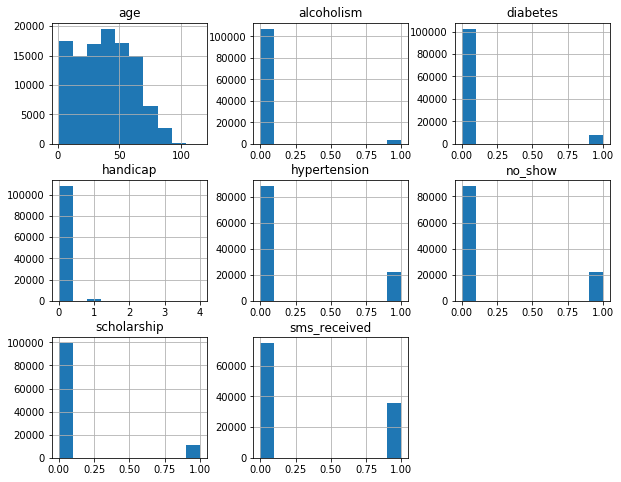

In [27]:
df.hist(figsize=(10,8))

### Does sms_received remind patient to show up the scheduled appointment?

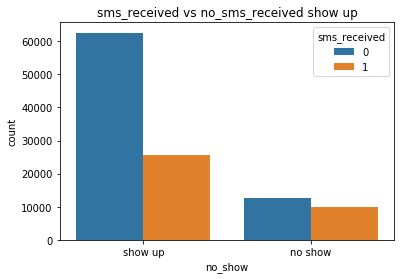

In [28]:
sns.countplot(x=df.no_show,hue=df.sms_received)
positions = (0,1)
labels = ('show up','no show')
plt.xticks(positions, labels)
plt.title('sms_received vs no_sms_received show up')
plt.show()

#### The graph for 'sms_received vs no_sms_received show up' shows us, it is obviously that patients recieved sms have a higher attendance rate than the patients who did not have received the sms.

### Does the type of the diseases affect the show up rate for the appointment?

#### From the table, we can find hypertension, diabetes and  alcoholism, let's check if the type of the diseases affect the attendance rate. 

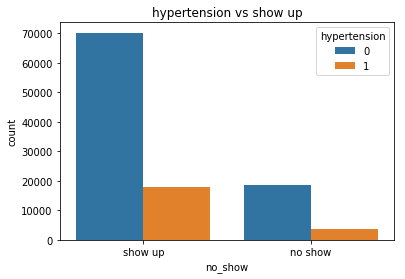

In [29]:
sns.countplot(x=df.no_show,hue=df.hypertension)
positions = (0,1)
labels = ('show up','no show')
plt.xticks(positions, labels)
plt.title('hypertension vs show up')
plt.show()

In [30]:
df.hypertension.value_counts()

0    88726
1    21801
Name: hypertension, dtype: int64

In [31]:
print(df.groupby('hypertension')['no_show'].mean())

hypertension
0    0.209037
1    0.173020
Name: no_show, dtype: float64


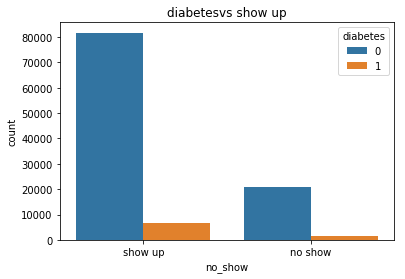

In [32]:
sns.countplot(x=df.no_show,hue=df.diabetes)
positions = (0,1)
labels = ('show up','no show')
plt.xticks(positions, labels)
plt.title('diabetes​vs show up')
plt.show()

In [33]:
df.diabetes.value_counts()

0    102584
1      7943
Name: diabetes, dtype: int64

In [34]:
print(df.groupby('diabetes')['no_show'].mean())

diabetes
0    0.203628
1    0.180033
Name: no_show, dtype: float64


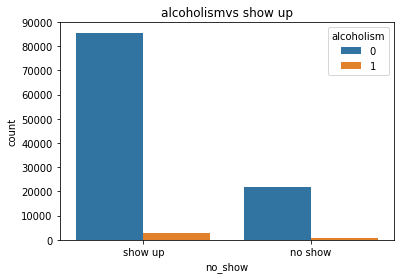

In [35]:
sns.countplot(x=df.no_show,hue=df.alcoholism)
positions = (0,1)
labels = ('show up','no show')
plt.xticks(positions, labels)
plt.title('alcoholism​vs show up')
plt.show()

In [36]:
df.alcoholism.value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

In [37]:
print(df.groupby('alcoholism')['no_show'].mean())

alcoholism
0    0.201946
1    0.201488
Name: no_show, dtype: float64


#### There are not too much alcoholismvs in the dataset. It is hard to tell if this is affect the show up rate. Both hypertension and diabetes have a lot of patients. Popular disease also increase the no show rate. However, the no show rate for hypertension and diabetes, is 18% and 17%, which is similar. There is no data set can prove that different kinds of diseases directly lead to absences.

### Does scholarship affect the no show rate for the appointment?

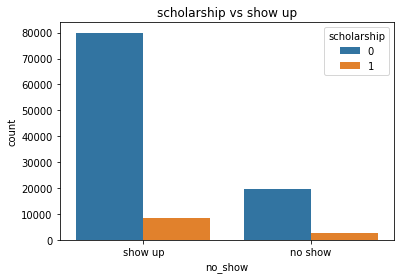

In [38]:
sns.countplot(x=df.no_show,hue=df.scholarship)
positions = (0,1)
labels = ('show up','no show')
plt.xticks(positions, labels)
plt.title('scholarship vs show up')
plt.show()

In [39]:
df.scholarship.value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

In [40]:
print(df.groupby('scholarship')['no_show'].mean())

scholarship
0    0.198072
1    0.237363
Name: no_show, dtype: float64


### Does gender affect the no show rate for the appointment?


Text(0.5,1,'sex vs show up')

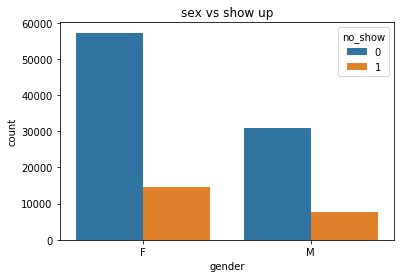

In [41]:
sns.countplot(x='gender', hue='no_show', data=df)
plt.title('sex vs show up')

In [42]:
print(df.groupby('gender')['no_show'].mean())

gender
F    0.203146
M    0.199679
Name: no_show, dtype: float64


<a id='conclusions'></a>
## Conclusions

#### The histogram for 'sms_received vs no_sms_received show up' shows us, it is obviously that patients recieved sms have a higher attendance rate than the patients who did not have received the sms.

#### There are not too much alcoholismvs in the dataset. It is hard to tell if this is affect the show up rate. Both hypertension and diabetes have a lot of patients. Popular disease also increase the no show rate. However, the no show rate for hypertension and diabetes, is 18% and 17%, which is similar. There is no data set can prove that different kinds of diseases directly lead to absences.

#### There are 19% people who have no scholarship absent, and 23% people who have scholarship absent for the appointment. It means people who have scholarship will have more posibility for the appointment no show. 

#### Gender is also another effect we might evaluate, however 20% absent rate for female,and 19.9% for male, does not shows huge difference. In this way I will not considering gender to the important factor for the appointment show up.

#### Overall, sms_received and scholarship should be two important factor affect the show up for the appointment. The diseases and gender do not have much effect through my research. If we wanna know if diseases will effect the show up rate, we might need collect the data for the chronic and acute diseases. 



In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0